# Linear regression implementation

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [112]:
df = pd.read_csv("C:/Users/User/OneDrive/Masaüstü/1.01. Simple linear regression.csv")


In [113]:
df.head()


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [114]:
df.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [115]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [116]:
df = pd.read_csv("C:/Users/User/OneDrive/Masaüstü/1.01. Simple linear regression.csv" , sep=",")


In [117]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


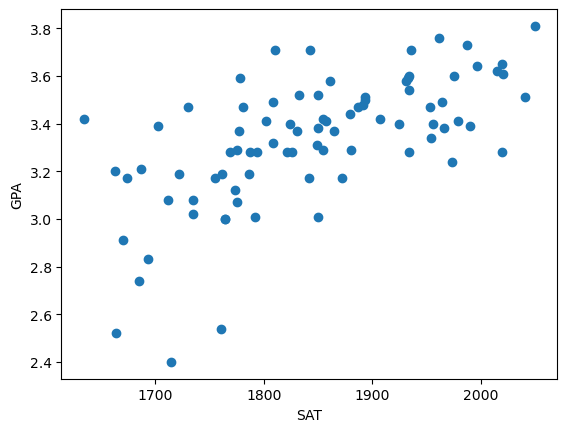

In [118]:

plt.scatter(df.SAT,df.GPA) 
plt.xlabel("SAT") #x ve y eksenlerine isim verdik.
plt.ylabel("GPA")    
plt.show()   

In [119]:
x = df.SAT.values #x array olarak geldi
x


array([1714, 1664, 1760, 1685, 1693, 1670, 1764, 1764, 1792, 1850, 1735,
       1775, 1735, 1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722,
       1663, 1687, 1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1775,
       1855, 1880, 1849, 1808, 1954, 1777, 1831, 1865, 1850, 1966, 1702,
       1990, 1925, 1824, 1956, 1857, 1979, 1802, 1855, 1907, 1634, 1879,
       1887, 1730, 1953, 1781, 1891, 1964, 1808, 1893, 2041, 1893, 1832,
       1850, 1934, 1861, 1931, 1933, 1778, 1975, 1934, 2021, 2015, 1997,
       2020, 1843, 1936, 1810, 1987, 1962, 2050], dtype=int64)

In [120]:
x.shape #84 satır ve 1 sütundan oluşur.

(84,)

In [121]:
x = df.SAT.values.reshape(-1,1) #-1 tüm satırları alır. 1 ise 1 sütunu alır.
y = df.GPA.values.reshape(-1,1)

In [122]:
from sklearn.linear_model import LinearRegression 


linear_reg = LinearRegression() #değişkene atadık
linear_reg.fit(x,y) #modeli fit ettik. Fit etmek demek Linear regression modelin oluşması demektir.


LinearRegression()

In [123]:
b0 = linear_reg.predict([[0]]) 
print("b0: ",b0) #y eksenini nerde kestiğine baktık

b0:  [[0.2750403]]


In [124]:
b0_ = linear_reg.intercept_    
print("b0: ",b0_)  

b0:  [0.2750403]


In [125]:
b1 = linear_reg.coef_  #modelin tahmin ettiği değeri bulduk
print("b1: ",b1)   

b1:  [[0.00165569]]


In [126]:
new_salary = 1663 + 1138*11  # y=b0+b1*x
print("11 yıllık deneyim olan birinin maaşı: ",new_salary)

11 yıllık deneyim olan birinin maaşı:  14181


In [127]:
b11 = linear_reg.predict([[10]])  
print("b11: ",b11)

b11:  [[0.29159718]]


In [128]:
y_head = linear_reg.predict(x)


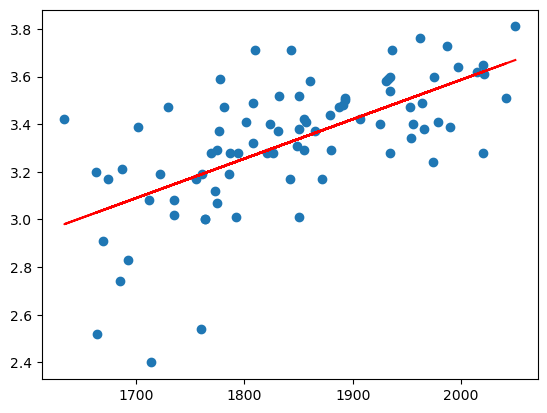

In [129]:
plt.plot(x, y_head, color="red")
plt.scatter(x,y)
plt.show()

In [130]:
from sklearn.metrics import r2_score
print("R Square Score: ",r2_score(y,y_head))

R Square Score:  0.40600391479679765


In [131]:
MSE = np.square(np.subtract(y,y_head)).mean()
print("Mean Squared Error: ",MSE)

Mean Squared Error:  0.04330086666167265


# Polynomial

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
     

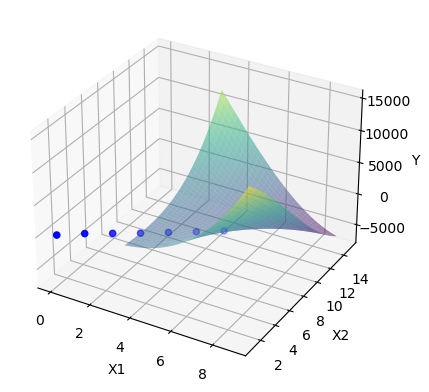

In [133]:
x1 = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([25, 152, 80, 0, 17, 22, 34])


poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(np.column_stack((x1, x2)))


model = LinearRegression()
model.fit(x_poly, y)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1_pred, x2_pred = np.meshgrid(np.arange(3, 9, 0.1), np.arange(2, 15, 0.1))
y_pred = model.predict(poly.fit_transform(np.column_stack((x1_pred.ravel(), x2_pred.ravel()))))
y_pred = y_pred.reshape(x1_pred.shape)

ax.scatter(x1, x2, y, c='blue')
ax.plot_surface(x1_pred, x2_pred, y_pred, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

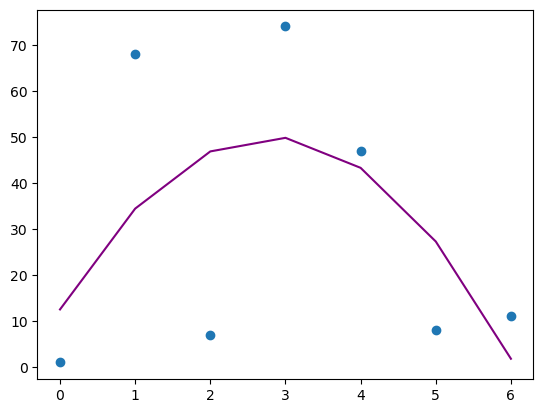

In [145]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([1, 68, 7, 74, 47, 8, 11])


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly, y)

plt.scatter(x,y)
plt.plot(x, model.predict(x_poly), color='PURPLE')
plt.show()


In [154]:
from sklearn.metrics import r2_score
df=pd.read_csv('C:/Users/User/OneDrive/Masaüstü/column_2C_weka (1).csv')
df.tail()     

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [151]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


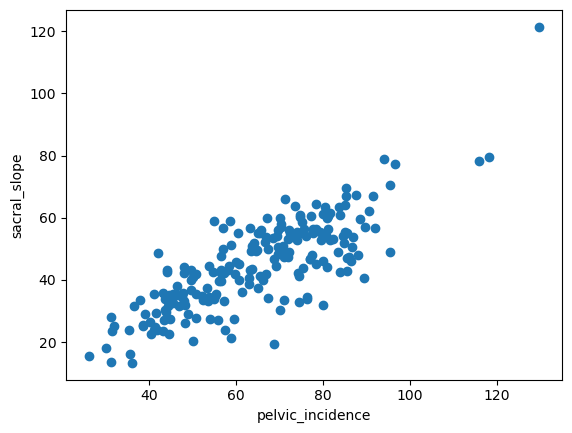

In [152]:
abnormaldata1 = df[df['class'] =='Abnormal']
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.show()

0.427619799498007
0.46077463950644426


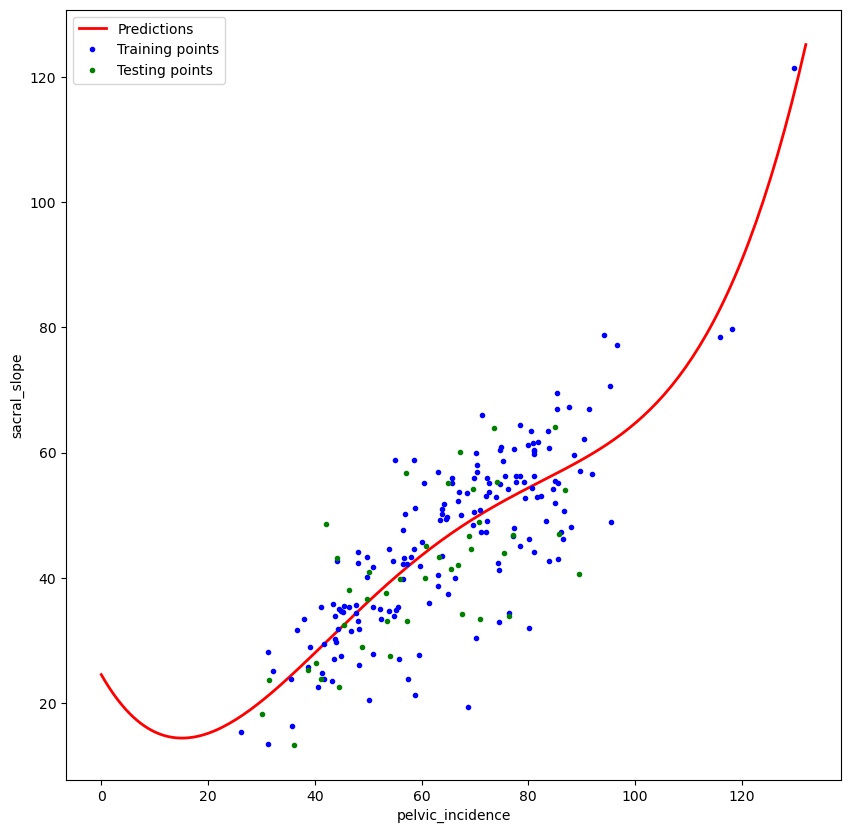

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))


X_new = np.linspace(0, 132, 200).reshape(200, 1)

X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()

# multiple linear regression- MLR

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [138]:
data = pd.read_csv("C:/Users/User/OneDrive/Masaüstü/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [139]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 100)

In [141]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred_mlr= mlr.predict(X_test)

print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.44386921 19.81374414 16.83393439 19.40297012 20.86332648 13.36555474
 11.90015623 12.46082213 20.5477632  20.79755839 10.68376151 19.93662374
  6.5485137  15.17091931  9.03046838  7.90524672 15.91749505 12.31909712
 16.79322515 11.38779983 16.87184045  9.98986525 20.80133898 17.22270483
 15.17807277 21.55775861 19.32272618 10.06677534 18.97954406 14.57916427
 14.07668358  7.41565752 10.29953501 14.87343618  7.16029448 13.39874584
  7.7234027  11.82334833 13.69444937 15.66557924 17.52146365 13.50327801
 14.53295656 14.05046675 11.77268376  8.93604476 12.21848567 19.25784269
  9.19091756  5.14852157 16.35435692 18.06098605 12.92413638 16.61928318
 17.72851293 12.15932049  4.46652282 10.76343228 16.07944848 13.51777118
 17.03429837 17.68642122 20.36143747 14.56692389  9.79461952  6.39594979
 14.93719158 12.12155006  6.56079889 15.26172357 12.51361814  8.81725167
 11.60687472 14.19583915 16.79952579 15.15692749 15.01366066  6.95832042
 18.33501666 15.18005651 1

In [143]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,10.443869
104,20.7,19.813744
99,17.2,16.833934
92,19.4,19.402970
111,21.8,20.863326


In [144]:
from sklearn import metrics
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Square Error:', meanSqErr)

R squared: 89.35
Mean Square Error: 2.1114079107161348
